In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde

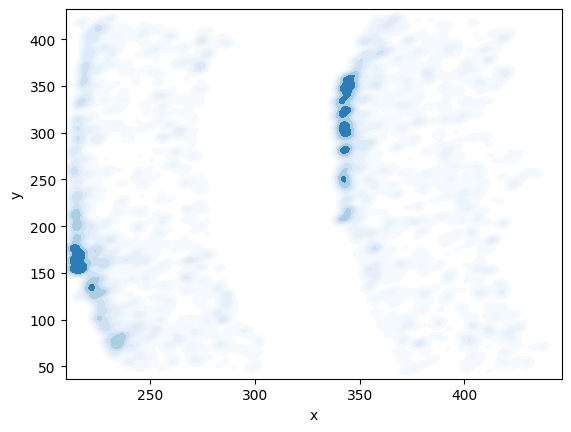

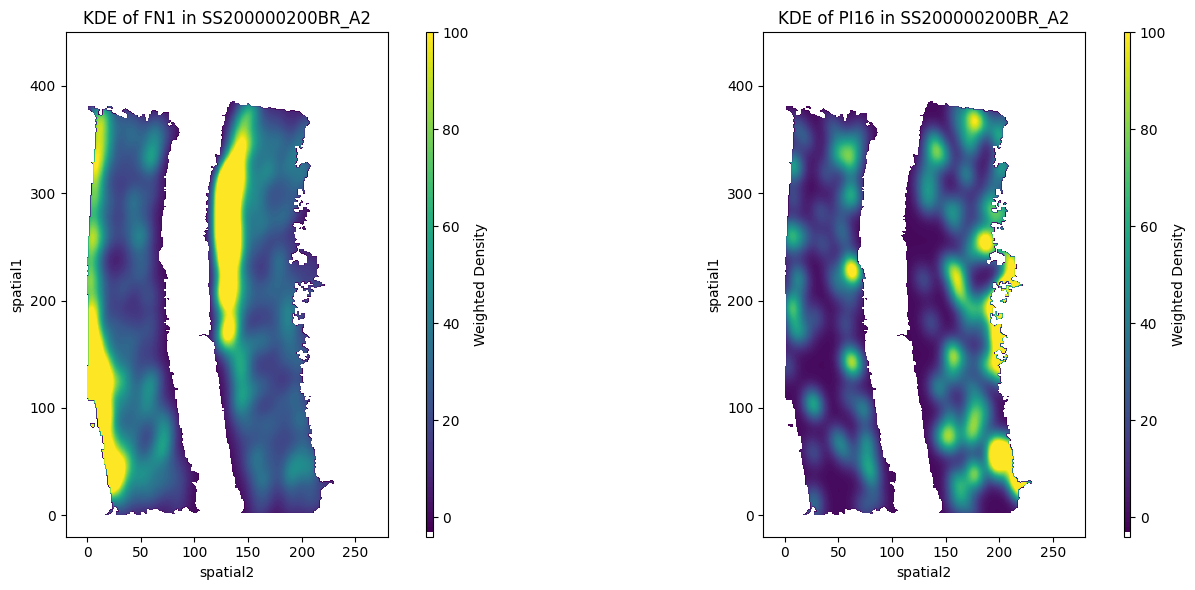

In [26]:
idd='SS200000200BR_A2'

df1=pd.read_csv(idd+'.PI16_FN1.csv',index_col=0)
df1 = df1.groupby(['x', 'y'], as_index=False).sum()

df1['tissue']=1
mtxt1 = df1.pivot(index='x', columns='y', values='tissue')
mtxt1 = mtxt1.fillna(0)
mtxt1[mtxt1==0] = -1

sns.kdeplot(x=df1.x, y=df1.y, weights=df1.FN1, cmap="Blues", fill=True, bw_adjust=0.1)
plt.show()

data = df1.copy()
x = data['x']
y = data['y']

values = np.vstack([x, y])
kde = gaussian_kde(values, bw_method=0.1, weights=data['FN1'])

xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

xx, yy = np.mgrid[xmin:xmax:202j, ymin:ymax:386j]  
positions = np.vstack([xx.ravel(), yy.ravel()])

kde_matrix = np.reshape(kde(positions).T, xx.shape)
kde_matrix2 = np.where(mtxt1 < 0, -1, 
                       100*(kde_matrix-np.min(kde_matrix))/(np.max(kde_matrix)-np.min(kde_matrix)))
kde_matrix2 = np.where(kde_matrix2 > 25, 25, kde_matrix2)
kde_matrix2 = 100*(kde_matrix2/25)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
cmap = ListedColormap(['white'] + plt.cm.viridis(np.linspace(0, 1, 100)).tolist())

im1 = axes[0].imshow(np.rot90(kde_matrix2), 
                extent=[0, xmax-xmin, 0, ymax-ymin],
                cmap=cmap)
plt.colorbar(im1, ax=axes[0], label='Weighted Density',aspect=80)
axes[0].set_title('KDE of FN1 in '+idd)
axes[0].set_xlabel('spatial2') 
axes[0].set_ylabel('spatial1') 
axes[0].set_aspect('equal')
axes[0].axis(xmin=-20,xmax=280,ymin=-20,ymax=450)


kde = gaussian_kde(values, bw_method=0.1, weights=data['PI16'])
kde_matrix = np.reshape(kde(positions).T, xx.shape)
kde_matrix3 = np.where(mtxt1 < 0, -1, 
                       100*(kde_matrix-np.min(kde_matrix))/(np.max(kde_matrix)-np.min(kde_matrix)))
kde_matrix3 = np.where(kde_matrix3 > 25, 25, kde_matrix3)
kde_matrix3 = 100*(kde_matrix3/25)

im2 = axes[1].imshow(np.rot90(kde_matrix3), 
                extent=[0, xmax-xmin, 0, ymax-ymin],
                cmap=cmap)
plt.colorbar(im2, ax=axes[1], label='Weighted Density',aspect=80)
axes[1].set_title('KDE of PI16 in '+idd)
axes[1].set_xlabel('spatial2') 
axes[1].set_ylabel('spatial1') 
axes[1].set_aspect('equal')
axes[1].axis(xmin=-20,xmax=280,ymin=-20,ymax=450)

plt.tight_layout()
plt.savefig(idd+'.PI16_FN1.kde.pdf')
# plt.show()

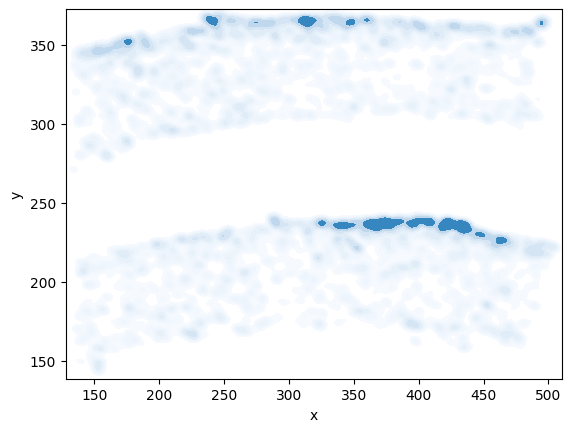

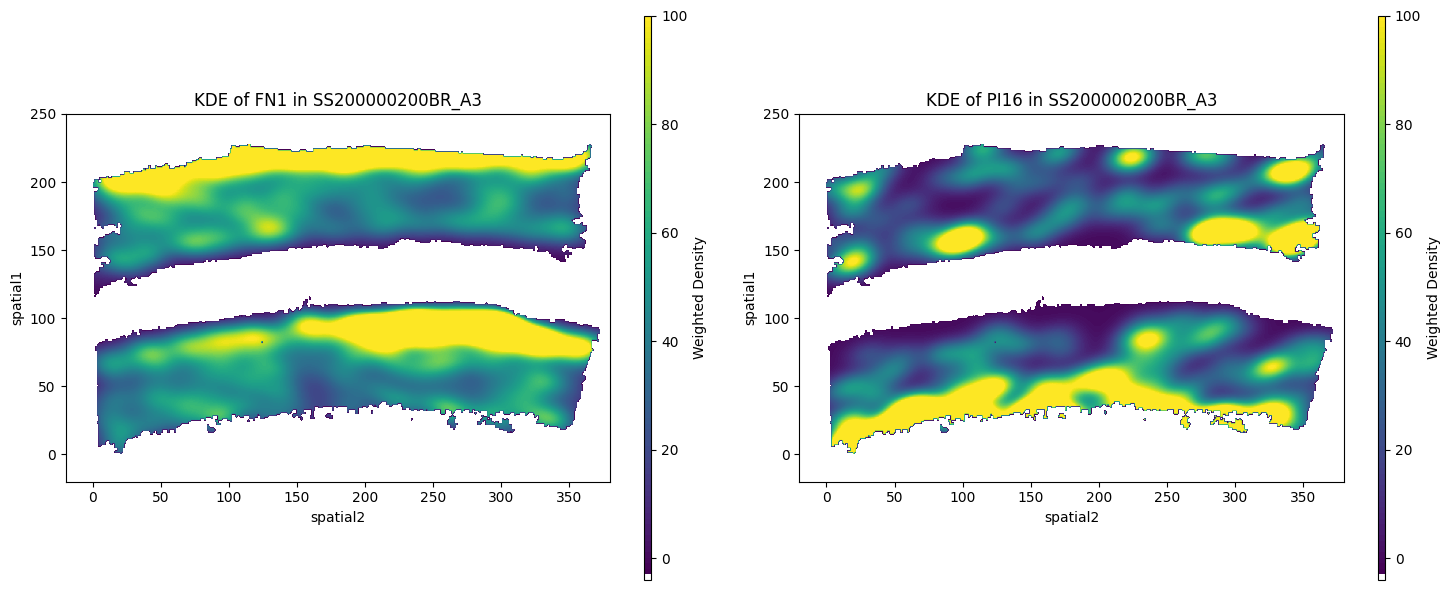

In [27]:
idd='SS200000200BR_A3'

df1=pd.read_csv(idd+'.PI16_FN1.csv',index_col=0)
df1 = df1.groupby(['x', 'y'], as_index=False).sum()

df1['tissue']=1
mtxt1 = df1.pivot(index='x', columns='y', values='tissue')
mtxt1 = mtxt1.fillna(0)
mtxt1[mtxt1==0] = -1

sns.kdeplot(x=df1.x, y=df1.y, weights=df1.FN1, cmap="Blues", fill=True, bw_adjust=0.1)
plt.show()

data = df1.copy()

x = data['x']
y = data['y']

values = np.vstack([x, y])
kde = gaussian_kde(values, bw_method=0.1, weights=data['FN1'])

xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

xx, yy = np.mgrid[xmin:xmax:373j, ymin:ymax:201j]
positions = np.vstack([xx.ravel(), yy.ravel()])

kde_matrix = np.reshape(kde(positions).T, xx.shape)
kde_matrix2 = np.where(mtxt1 < 0, -1, 
                       100*(kde_matrix-np.min(kde_matrix))/(np.max(kde_matrix)-np.min(kde_matrix)))
kde_matrix2 = np.where(kde_matrix2 > 25, 25, kde_matrix2)
kde_matrix2 = 100*(kde_matrix2/25)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
cmap = ListedColormap(['white'] + plt.cm.viridis(np.linspace(0, 1, 100)).tolist())

im1 = axes[0].imshow(np.rot90(kde_matrix2), 
                extent=[0, xmax-xmin, 0, ymax-ymin],
                cmap=cmap)#, axes = axes[0])
plt.colorbar(im1, ax=axes[0], label='Weighted Density',aspect=80)
axes[0].set_title('KDE of FN1 in '+idd)
axes[0].set_xlabel('spatial2')
axes[0].set_ylabel('spatial1')
axes[0].set_aspect('equal')
axes[0].axis(xmin=-20,xmax=380,ymin=-20,ymax=250)

kde = gaussian_kde(values, bw_method=0.1, weights=data['PI16'])
kde_matrix = np.reshape(kde(positions).T, xx.shape)
kde_matrix3 = np.where(mtxt1 < 0, -1, 
                       100*(kde_matrix-np.min(kde_matrix))/(np.max(kde_matrix)-np.min(kde_matrix)))
kde_matrix3 = np.where(kde_matrix3 > 25, 25, kde_matrix3)
kde_matrix3 = 100*(kde_matrix3/25)

im2 = axes[1].imshow(np.rot90(kde_matrix3), 
                extent=[0, xmax-xmin, 0, ymax-ymin],
                cmap=cmap)
plt.colorbar(im2, ax=axes[1], label='Weighted Density',aspect=80)
axes[1].set_title('KDE of PI16 in '+idd)
axes[1].set_xlabel('spatial2')
axes[1].set_ylabel('spatial1')
axes[1].set_aspect('equal')
axes[1].axis(xmin=-20,xmax=380,ymin=-20,ymax=250)

plt.tight_layout()
plt.savefig(idd+'.PI16_FN1.kde.pdf')
# plt.show()